In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns  # 统计数据可视化
from scipy import stats
from sklearn.linear_model import LinearRegression

# 绘图风格： style= ["darkgrid"，"whitegrid"，"dark"，"white"，"ticks"]，默认darkgrid
sns.set_style(style="darkgrid")
# 颜色风格： themes = ['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']
sns.set_palette(palette='bright')
ChinaFonts = {"黑体": "simhei", "宋体": "simsun", "华文楷体": "STKAITI"}
plt.rcParams["font.sans-serif"] = ChinaFonts["黑体"]  # 解决中文乱码问题
plt.rcParams["axes.unicode_minus"] = False  # 解决负号无法正常显示的问题
path_data = "/home/carton/workspace/python/Multivariate-statistical-analysis/database/第七章数据/"  # 设置 数据路径
path_pic = "/home/carton/workspace/python/Multivariate-statistical-analysis/save-database/第七章数据/"  # 设置 图像保存路径

## 1. 读取文件，计算相关系数及绘制散点图

In [2]:
file_age = path_data + "年龄-血压数据.xlsx" # 指定 路径 + 文件名
df_data = pd.read_excel(file_age)
 # 读取数据
print("年龄~血压 相关系数 = {:.4f}".format(df_data.corr().iloc[0,1]))

年龄~血压 相关系数 = 0.8253


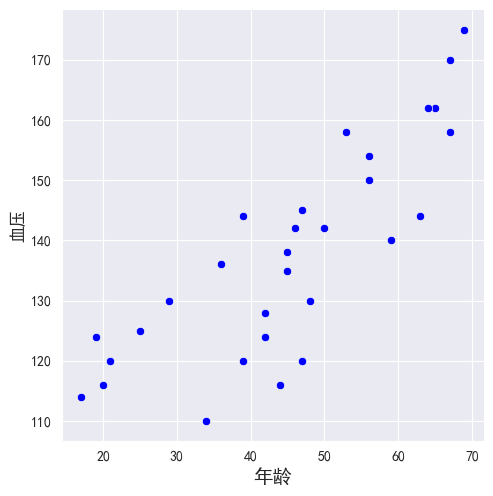

In [3]:
# 绘制散点图
sns.axes_style("darkgrid")
sns.relplot(data=df_data, x='年龄', y='血压', color="b")
plt.xlabel('年龄',fontsize=14); plt.ylabel('血压',fontsize=12)
plt.show()

## 2. 分析血压与年龄的关系（一元线性回归）
- 直接矩阵计算

In [6]:
def standRegress(xArr, yArr):
 # 标准回归
    XMat = np.mat(xArr); 
    yMat = np.mat(yArr).T;
    xTx = XMat.T*XMat
    
    if np.linalg.det(xTx) == 0:
        print("行列式为0,xTx矩阵不可逆");
        return
    return xTx.I*(XMat.T*yMat)

x = np.array(df_data["年龄"])
 # y = b0 + b1 * x 常数对应数据相当于为1,需补充系数
xArr = sm.add_constant(x);
yArr = np.array(df_data["血压"])
# 或 xArr = np.vstack( (np.ones_like(x), x) ).T
ws = standRegress(xArr, yArr)
print("回归方程为:\t 血压(y) = {:.4f} + {:.4f} * 年龄(x)".format(ws[0,0],ws[1,0]))

回归方程为:	 血压(y) = 94.8249 + 0.9507 * 年龄(x)


- LinearRegression

In [7]:
reg = LinearRegression()
reg.fit(df_data[["年龄"]], df_data[["血压"]])
# (1) 注意 引用时 有两层方括号; (2) fit 拟合确定参数
print("回归方程为:\t 血压(y) = {:.4f} + {:.4f} * 年龄(x)".format(
reg.intercept_[0], reg.coef_[0][0]))

回归方程为:	 血压(y) = 94.8249 + 0.9507 * 年龄(x)


- ols

In [9]:
model = sm.formula.ols(formula="血压~年龄", data=df_data).fit()
print("回归方程为:\t 血压(y) = {:.4f} + {:.4f} * 年龄(x)".format(
model.params[0], model.params[1]))

回归方程为:	 血压(y) = 94.8249 + 0.9507 * 年龄(x)


## 3. 绘制回归统计图
- 带置信域的回归直线

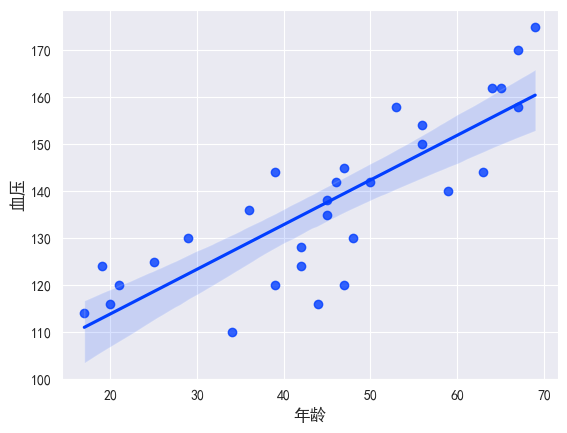

In [10]:
sns.regplot(x="年龄", y="血压", data=df_data)
plt.xlabel('年龄',fontsize=12)
plt.ylabel('血压',fontsize=12)
plt.show()

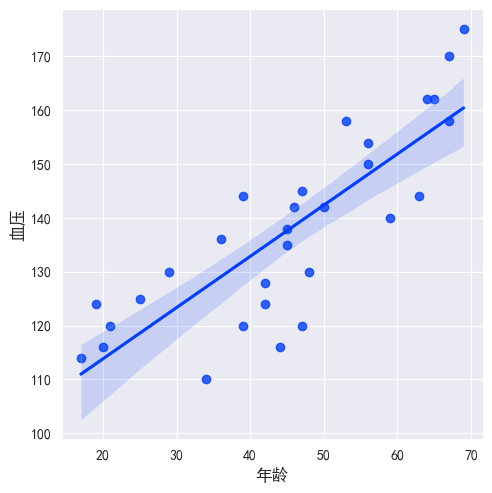

In [11]:
sns. lmplot(x="年龄", y="血压", data=df_data)
plt.xlabel('年龄',fontsize=12)
plt.ylabel('血压',fontsize=12)
plt.show()

- 绘制回归残差图

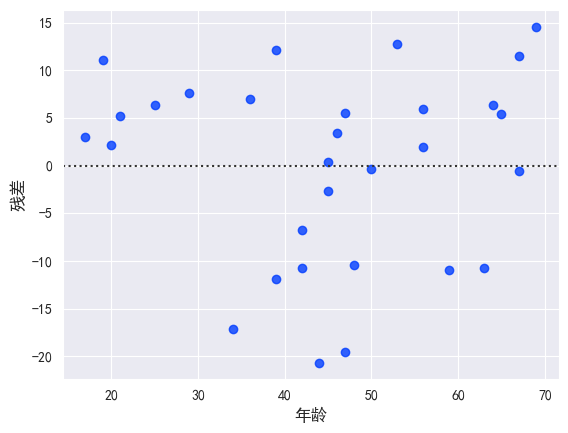

In [12]:
# 方法1:借助函数
sns.residplot(x="年龄", y="血压", data=df_data)
plt.xlabel('年龄',fontsize=12)
plt.ylabel('残差',fontsize=12)
plt.show()

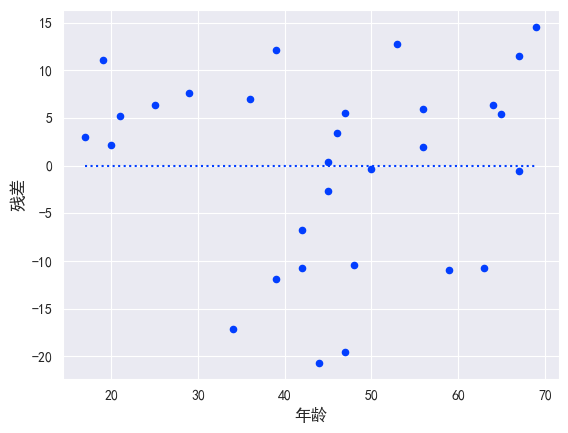

In [13]:
# 方法2:计算后绘图
model = sm.formula.ols(formula="血压~年龄", data=df_data).fit()
df_data["回归值"] = model.predict() # 预测
df_data["残差"] = df_data["血压"] -df_data["回归值"]
df_data.plot(kind="scatter",x='年龄',y='残差')
plt.hlines(y=0, xmin=df_data["年龄"].min(), xmax=df_data["年龄"].max() ,ls=':')
plt.xlabel('年龄',fontsize=12); plt.ylabel('残差',fontsize=12)
plt.show()

## 4.显著性检验和拟合优度
- R-squared: 拟合优度，越接近1越好
- Prop（F-statistic）: F检验法的P值，越小越好
- P>|t|: t检验法中常数项和系数对应的P值，接近0说明拟合的好

In [14]:
model = sm.formula.ols(formula="血压~年龄", data=df_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     血压   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     59.80
Date:                Fri, 13 Jan 2023   Prob (F-statistic):           2.01e-08
Time:                        15:01:35   Log-Likelihood:                -110.98
No. Observations:                  30   AIC:                             226.0
Df Residuals:                      28   BIC:                             228.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     94.8249      5.849     16.214      0.0

## 5.分析血压与年龄之间的关系（局部加权线性回归）

In [15]:
def lwlr(testPoint, xArr, yArr, k=.10):
    XMat = np.mat(xArr);
    yMat = np.mat(yArr).T
    m, n = XMat.shape;
    weights = np.mat(np.eye(m)) #创建对角矩阵
    for j in range(m):
        diff = testPoint - XMat[j,:]
        weights[j,j] = np.exp(diff * diff.T/(-2.0 * k * k))
    # 高斯核权重
    xTx = XMat.T * (weights * XMat)
    if np.linalg.det(xTx) == 0:
        print("行列式为0,xTx矩阵不可逆");
        return
    ws = xTx.I * (XMat.T * (weights * yMat ))
    # 局部加权线性回归
    return testPoint * ws

In [16]:
def lwlrTest(testArr, xArr, yArr, k=1.0):
    m,n = testArr.shape;
    yHat = np.zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i], xArr, yArr, k)
    return yHat

df_data = df_data.sort_values(by="年龄") # 排序以便局部加权按顺序进行
x = np.array(df_data["年龄"])
xArr = sm.add_constant(x);
yArr = np.array(df_data["血压"])
reg = LinearRegression()
reg.fit(df_data[["年龄"]], df_data[["血压"]]) # (1) 注意 引用时 有两层方括号; (2) fit 拟合确定参数
y_reg = reg.predict(df_data[["年龄"]])

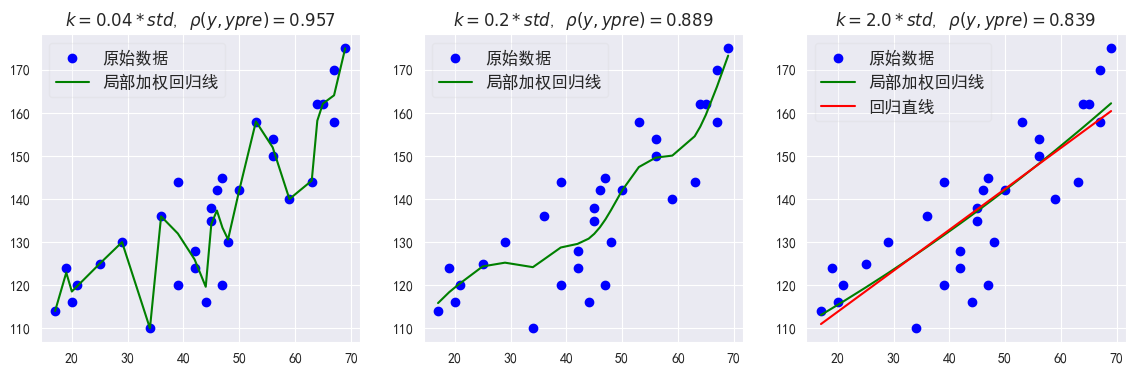

In [17]:
k_list = np.array([0.04, 0.2, 2]);
std = df_data["血压"].std(ddof=1)
fig, ax = plt.subplots(1,3, figsize=(14,4))
for i in range(3):
    k = k_list[i] * std;
    yHat = lwlrTest(xArr, xArr, yArr, k)
    ax[i].plot(df_data[["年龄"]], df_data[["血压"]], 'o', c="b", label="原始数据")
    ax[i].plot(x, yHat, "-", c="g", label="局部加权回归线")
    if i == 2:
        ax[i].plot(x, y_reg, "-", c="r", label="回归直线")
    ax[i].legend(loc='best', fontsize=12, frameon=True, framealpha=0.2)
    plt.rc('text', usetex=True)
    ax[i].set_title("$k={}*std$, $\\rho(y, ypre)={:.3f}$".format(k_list[i],
        np.corrcoef(yArr, yHat)[0,1]))
    plt.rc('text', usetex=False)
plt.show()

## 6.大春粮食产量的预报模型（多元线性回归）

In [26]:
file_age1 = path_data + "大春粮食产量模型.xlsx" # 指定 路径 + 文件名
df_data1 = pd.read_excel(file_age1)
df_corr = df_data1.corr()

### 通过绘制矩阵图和相关系数热力图,找出哪些变量与因变量存在线性关系

<AxesSubplot: >

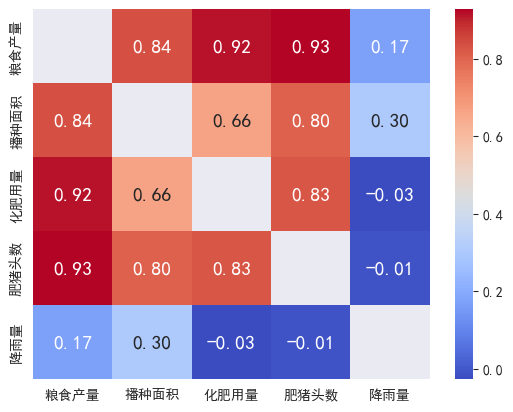

In [23]:
sns.heatmap(df_data1.corr(),annot=True,fmt=".2f", cmap="coolwarm",annot_kws={ "size":14},mask=(df_data1.corr()==1))

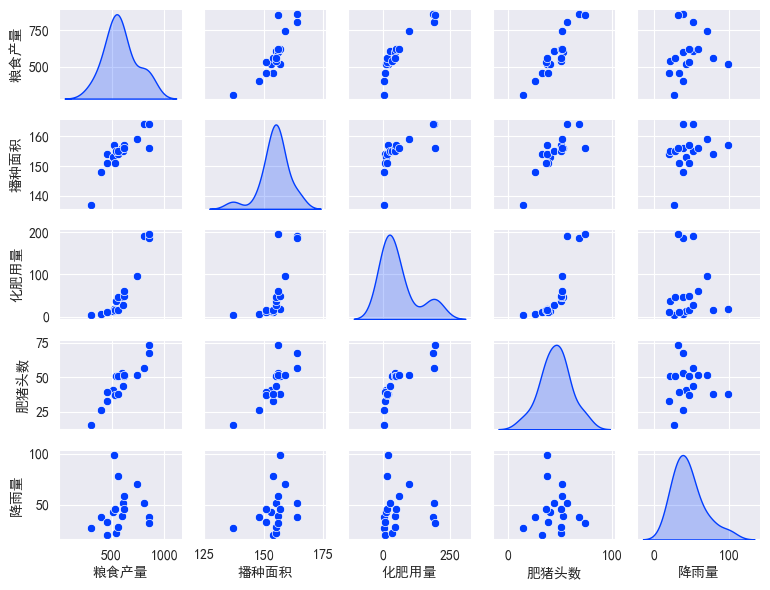

In [25]:
sns.pairplot(df_data1, height=1.2, aspect=1.3,diag_kind="kde")
plt.tight_layout()
plt.show()

可发现除了降雨量之外,其余自变量与粮食产量存在线性关系(其中肥猪头数的相关度最高)

In [28]:
model = sm.formula.ols(formula="粮食产量~ 播种面积 + 化肥用量 + 肥猪头数+ 降雨量", data=df_data1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   粮食产量   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     98.04
Date:                Fri, 13 Jan 2023   Prob (F-statistic):           1.43e-09
Time:                        15:28:48   Log-Likelihood:                -84.267
No. Observations:                  18   AIC:                             178.5
Df Residuals:                      13   BIC:                             183.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -221.6336    337.750     -0.656      0.5

/opt/anaconda/envs/data-science/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### 拟合优度检验
R-squared: 拟合优度，越接近1越好